In [145]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [146]:
sim_path = '../../results/synth_classification_fixed_dataset_and_samples/05-05-2023-14:38'

In [147]:
def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

runs_dirs = get_immediate_subdirectories(sim_path)

In [148]:
concept_list_dict = {}
metadata = {}

for run in runs_dirs:

    with open(sim_path + '/'+ run +'/metadata.json', 'r') as f:
        metadata[run] = json.load(f)

    concept_list_dict[run] = []
    for n in range(metadata[run]['n_concepts']):
        concept_list_dict[run].append(pd.read_csv(
            sim_path + '/'+ run + '/concept_' + str(n) + '.csv',
        ))

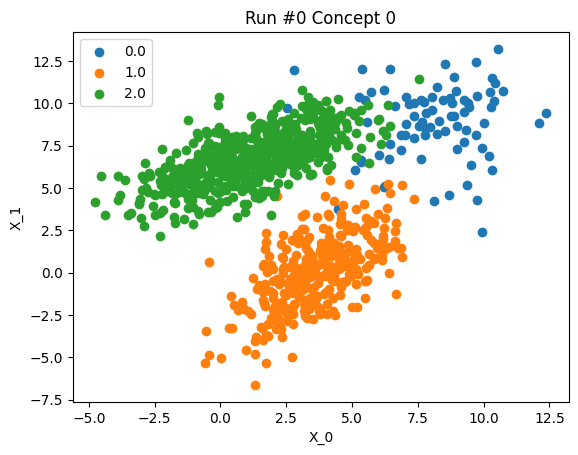

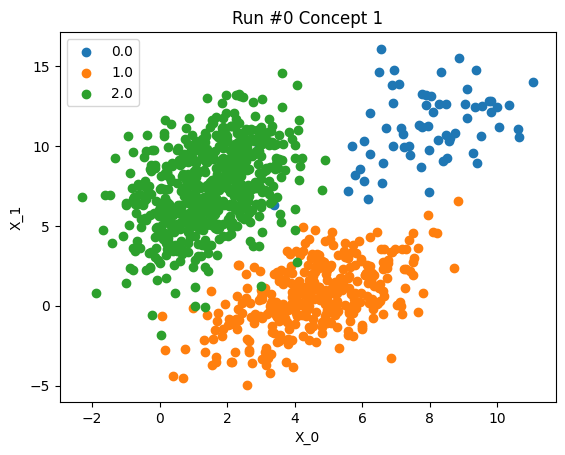

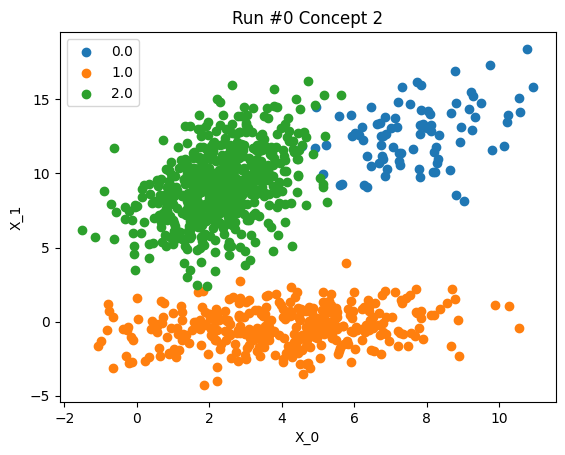

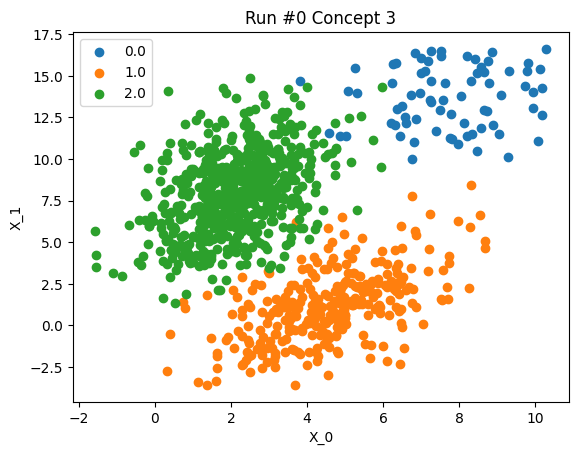

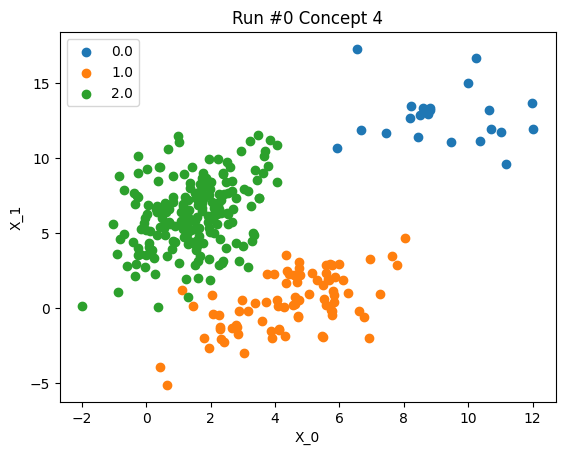

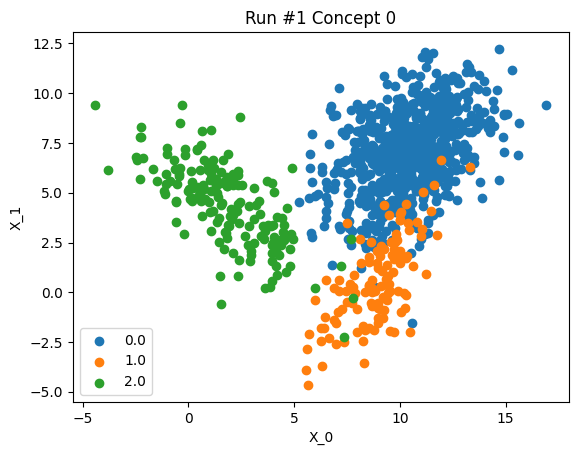

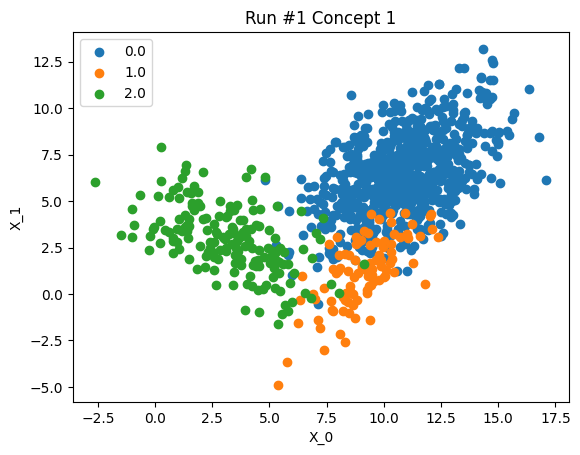

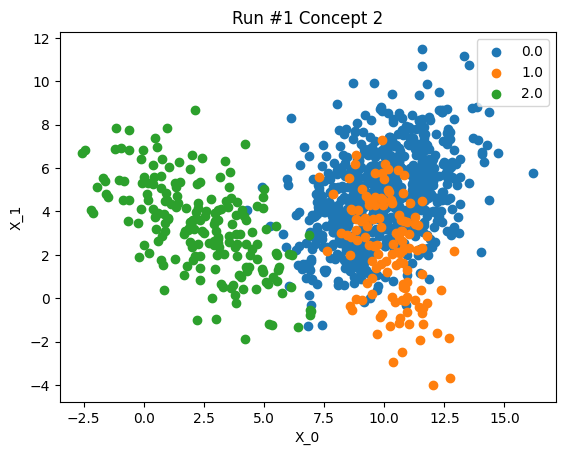

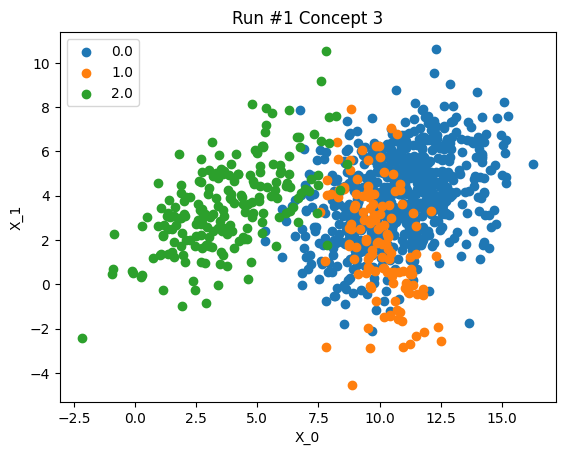

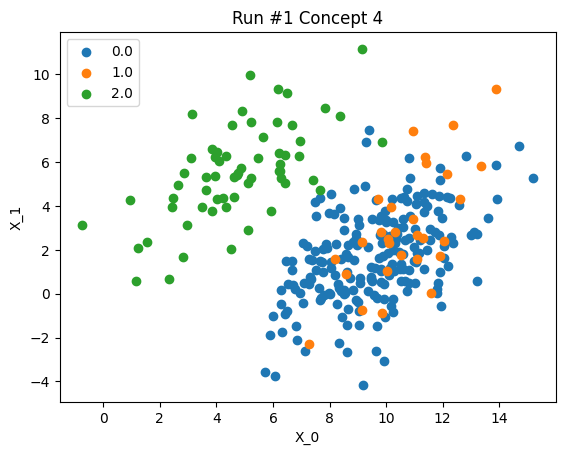

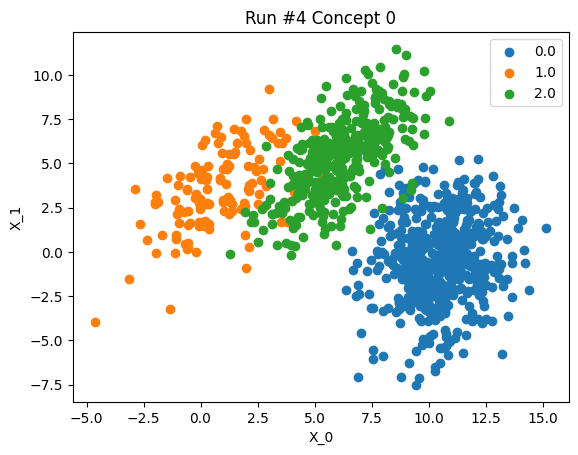

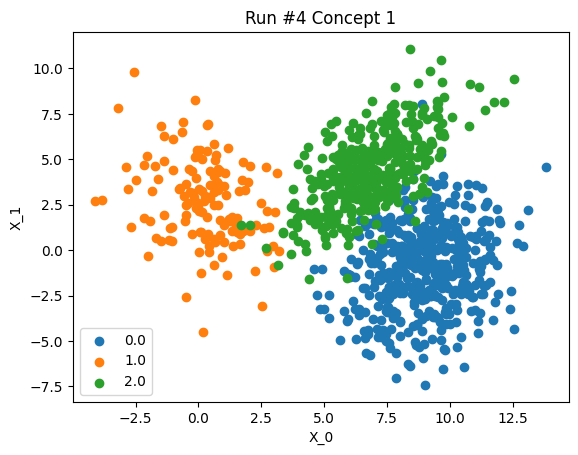

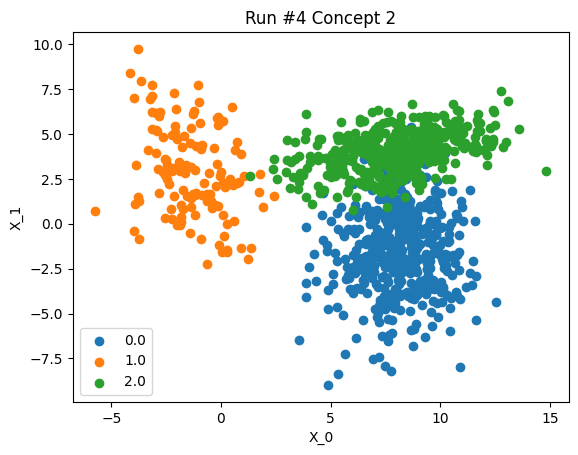

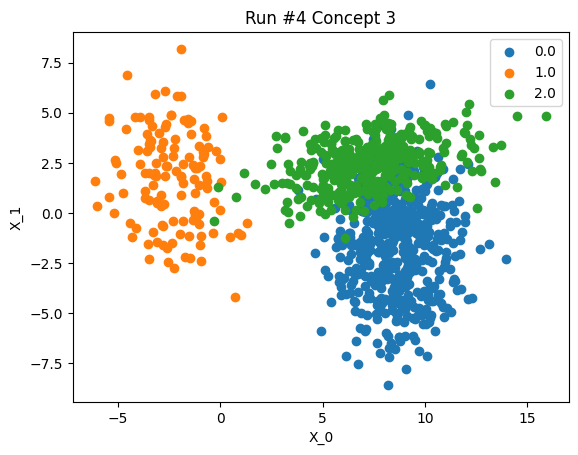

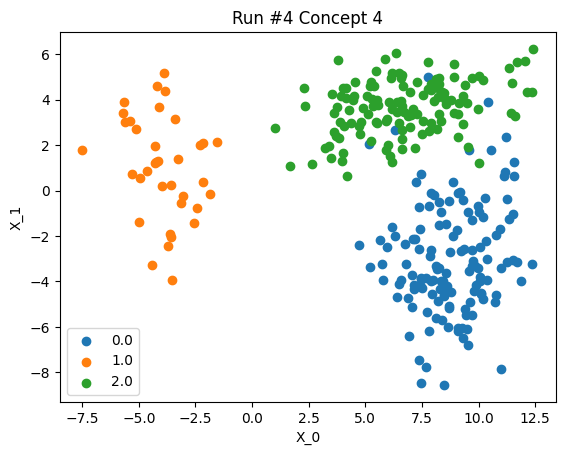

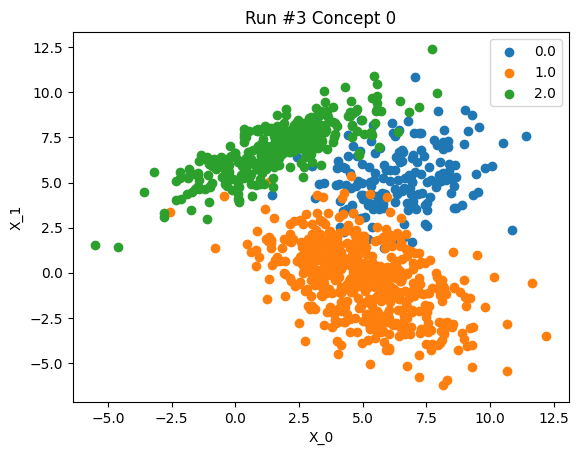

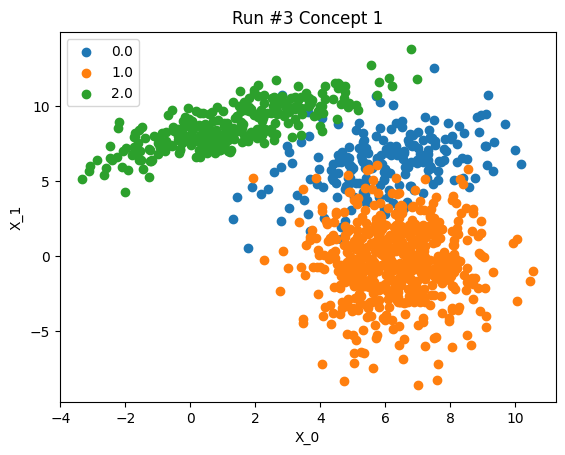

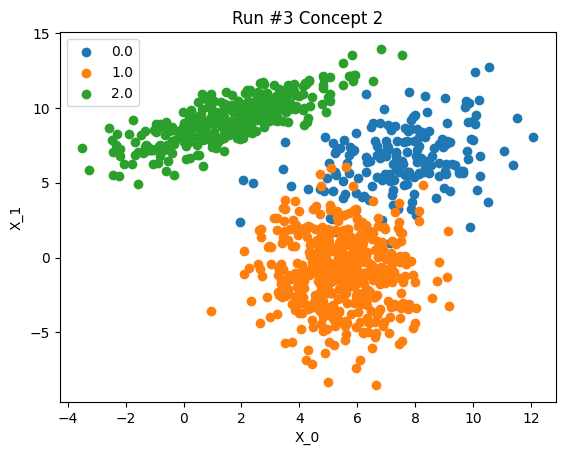

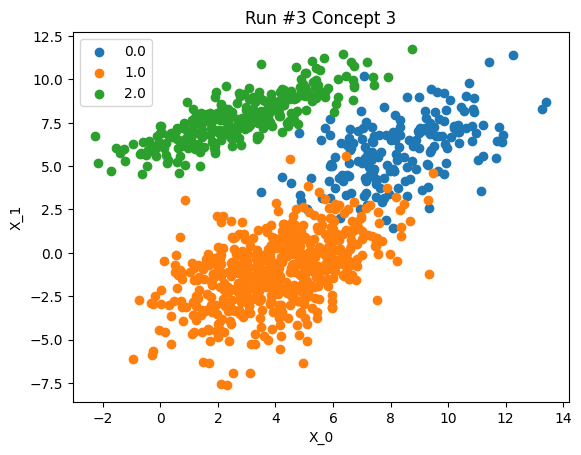

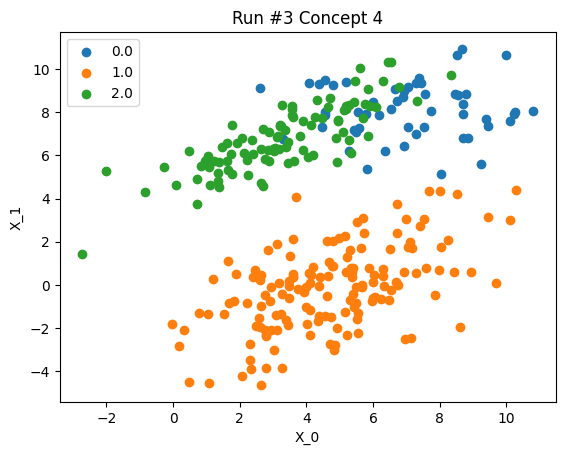

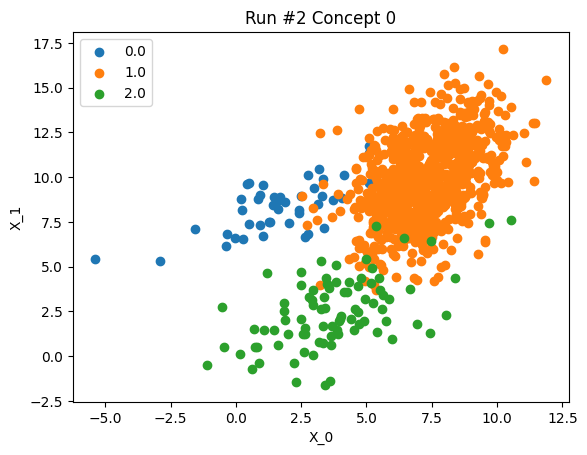

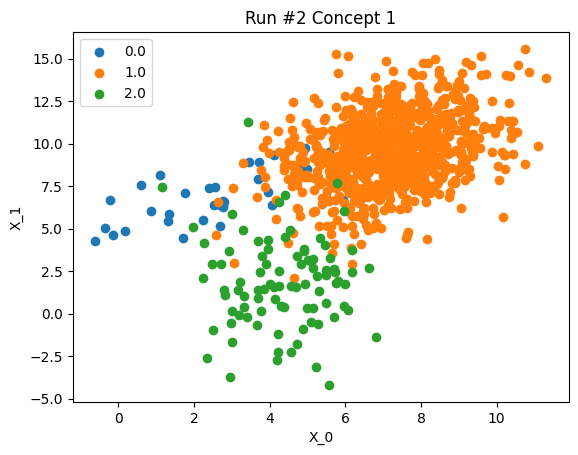

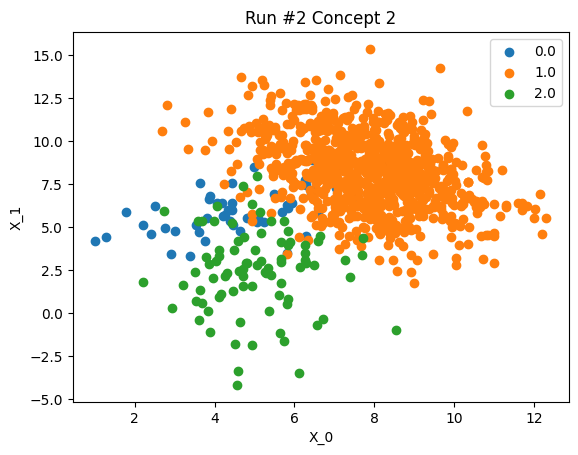

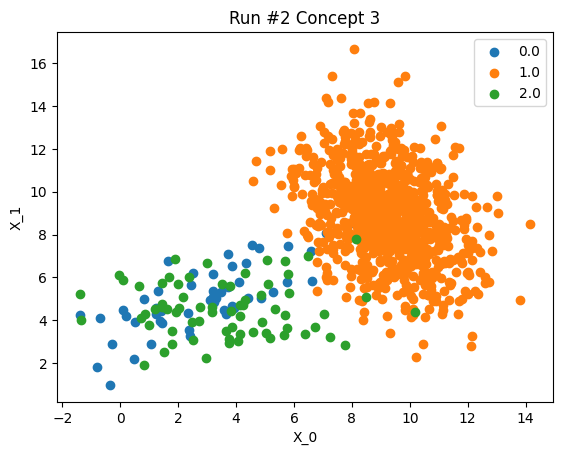

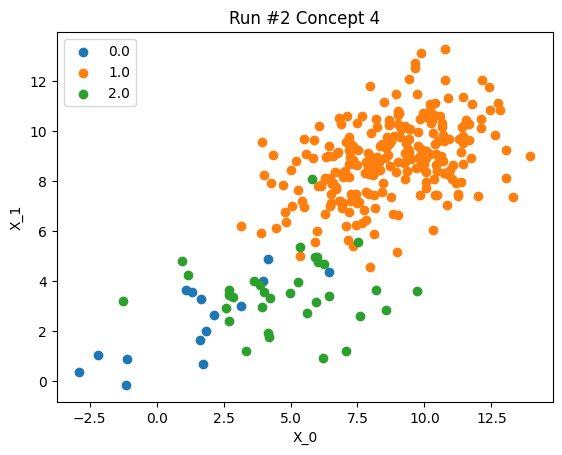

In [149]:
for (run, concept_list) in concept_list_dict.items():
    for index,concept in enumerate(concept_list):
        classes_groups = concept.groupby('y_0')

        fig, ax = plt.subplots()
        for i, (label, group) in enumerate(classes_groups):
            ax.scatter(group['X_0'], group['X_1'],
                    label=label)
        plt.xlabel('X_0')
        plt.ylabel('X_1')
        ax.legend()
        plt.title('Run #' + str(run) + ' Concept ' + str(index))
        plt.show()

In [151]:
metadata['1']['means']

[[9.55159519515309, 2.1061274538893446],
 [10.809673583837105, 3.195542134476587],
 [4.676342743877833, 5.645278114813934]]

In [156]:
from sklearn.metrics import euclidean_distances

euclidean_distances([[9.55159519515309, 2.1061274538893446]], [[10.809673583837105, 3.195542134476587]])

array([[1.66420719]])